In [3]:
%load_ext jupyter_black
%load_ext autoreload
%autoreload 2

In [4]:
import sys

sys.path.append("..")

## Data understand

In [5]:
import pandas as pd
from utils.utils import set_seed

set_seed()

In [6]:
ds_train = pd.read_csv("../data/avila/avila-tr.txt", header=None)
ds_test = pd.read_csv("../data/avila/avila-ts.txt", header=None)

In [7]:
ds_train.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,A
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,A
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,A
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,A
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,F


In [8]:
print(ds_train.shape)
print(ds_test.shape)

(10430, 11)
(10437, 11)


### Missing values

In [9]:
from IPython.display import display, Markdown


def display_missing_values(df):
    """
    This function calculates the percentage of missing values in each column of a
    Pandas DataFrame and displays the results in descending order.

    :return: None
    """

    missing_values = df.isnull().sum() / len(df) * 100
    missing_values = missing_values.sort_values(ascending=False)
    missing_values.rename("% Missing Values", inplace=True)
    display(Markdown(missing_values.to_markdown()))
    del missing_values


def unique_values_table(df, uv=3):
    """
    Print a markdown table
    with the col, the number of unique values and the unique values
    list if there are less than 3 unique values (uv) by defalt.

    :param uv: int
    :return: None
    """
    from IPython.display import display, Markdown

    md_table_str = "|Column Name|Unique Values||\n|---|---|---|\n"
    for col_name, unique_values in df.nunique().items():
        if unique_values > uv:
            md_table_str += "|{}|{}|\n".format(col_name, unique_values)
        else:
            md_unique_str = " ".join(
                [
                    f"{name}: {value*100:.2f}\%"
                    for name, value in df[col_name].value_counts(normalize=True).items()
                ]
            )

            md_table_str += "|{}|{}|{}\n".format(col_name, unique_values, md_unique_str)
    display(Markdown(md_table_str))

In [10]:
print("Missing values in the training set:")
display_missing_values(ds_train)

print("Missing values in the test set:")
display_missing_values(ds_test)

Missing values in the training set:


|    |   % Missing Values |
|---:|-------------------:|
|  0 |                  0 |
|  1 |                  0 |
|  2 |                  0 |
|  3 |                  0 |
|  4 |                  0 |
|  5 |                  0 |
|  6 |                  0 |
|  7 |                  0 |
|  8 |                  0 |
|  9 |                  0 |
| 10 |                  0 |

Missing values in the test set:


|    |   % Missing Values |
|---:|-------------------:|
|  0 |                  0 |
|  1 |                  0 |
|  2 |                  0 |
|  3 |                  0 |
|  4 |                  0 |
|  5 |                  0 |
|  6 |                  0 |
|  7 |                  0 |
|  8 |                  0 |
|  9 |                  0 |
| 10 |                  0 |

### Classes Histogram

<Axes: title={'center': 'Distribution of the target variable - Train Set'}, xlabel='10', ylabel='Count'>

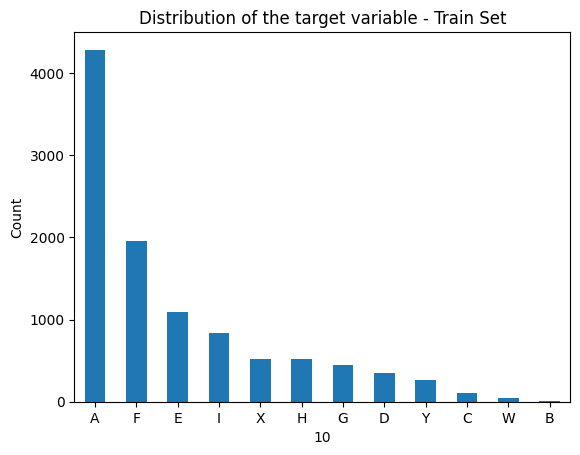

In [11]:
from matplotlib import pyplot as plt

plt.title("Distribution of the target variable - Train Set")
plt.xlabel("Target variable")
plt.ylabel("Count")
ds_train[10].value_counts().plot(kind="bar", rot=0)

<Axes: title={'center': 'Distribution of the target variable - Test Set'}, xlabel='10', ylabel='Count'>

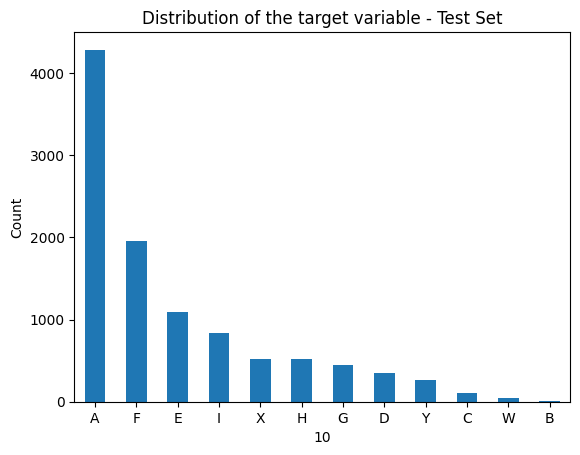

In [29]:
plt.title("Distribution of the target variable - Test Set")
plt.xlabel("Target variable")
plt.ylabel("Count")
ds_test[10].value_counts().plot(kind="bar", rot=0)

### Variables correlation

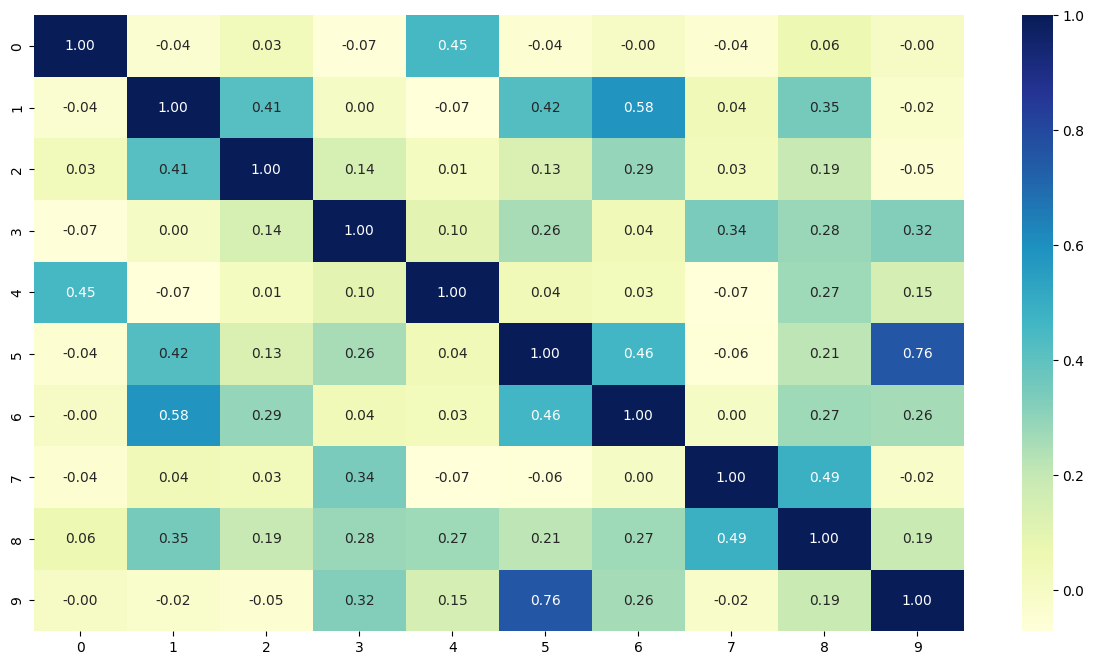

In [28]:
import seaborn as sns

plt.title("Correlation of variables - Train Set")
plt.figure(figsize=(15, 8))
sns.heatmap(
    ds_train[ds_train.columns[:-1]].corr(), annot=True, fmt=".2f", cmap="YlGnBu"
)
plt.show()